In [50]:
import pandas as pd

df = pd.read_csv("../running_log.txt", names = ["Problem Size", "SAT with heuristic", "Naive SAT", "Greedy Method"])
df

,Problem Size,SAT with heuristic,Naive SAT,Greedy Method
0,3,Ok(336.76µs),Ok(245.49µs),Ok(86.45µs)
1,3,Ok(257.041µs),Ok(341.21µs),Ok(88.09µs)
2,3,Ok(235.23µs),Ok(234.689µs),Ok(113.709µs)
3,3,Ok(236.339µs),Ok(270.97µs),Ok(99.43µs)
4,3,Ok(206.72µs),Ok(252.35µs),Ok(87.62µs)
...,...,...,...,...
514,8,Ok(33.863797603s),Ok(130ns),Ok(1.140689ms)
515,8,Ok(3.956874631s),Ok(170ns),Ok(1.888418ms)
516,8,Ok(2.518335402s),Ok(30ns),Ok(1.524719ms)
517,8,Ok(50.755398ms),Ok(180ns),Ok(1.006129ms)


In [51]:
import math

def get_time_in_seconds(input: str):
    if type(input) is not str:
        return input
    start = input.find("(")
    if start == -1:
        return input
    end = input.find(")")
    if input[start:end].endswith("ms"):
        multiplier = 0.001
        newend = end-2
    elif input[start:end].endswith("ns"):
        multiplier = 1e-9
        newend = end - 2
    elif input[start:end].endswith("µs"):
        multiplier = 1e-6
        newend = end - 2
    elif input[start:end].endswith("s"):
        multiplier = 1
        newend = end - 1
    try:
        result = float(input[start+1:newend]) * multiplier
        if result < 1e-6:
            return 10000
        return result
    except:
        return input

cleaned_data = df.applymap(get_time_in_seconds)

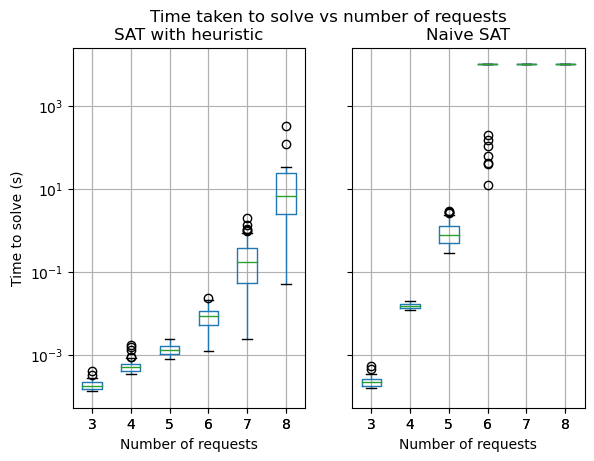

In [52]:
import matplotlib.pyplot as plt


plot = cleaned_data.boxplot(column=["SAT with heuristic", "Naive SAT"], by="Problem Size")

for p in plot:
    p.set_yscale('log')
    p.set_ylabel('Time to solve (s)')
    p.set_xlabel('Number of requests')

plt.suptitle("Time taken to solve vs problem size")
plt.show()